# Complex Graphics with Seaborn

Throughout this course, we've seen how to use our basic Python skills to create sophisticated data graphics. Some nice developers have created the the Seaborn package, which can automate some of the work for us. Using Seaborn, we can create familiar plots more easily, and create new ones as well. 

Both base Matplotlib and Seaborn graphics are welcome on your projects. Please keep in mind that you must be ready to explain every facet of a plot. So, if you use a fancy Seaborn function to create a complicated visualization and then discuss only some of its facets, you may lose points for showing unnecessary information. 

In [56]:
import pandas as pd

In [57]:
url = "https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/datasets/gapminder.csv"
gapminder = pd.read_csv(url)
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Seaborn builds on the foundation of Matplotlib. It includes several simple commands to make very complex visualizations, including ones which would normally require a `for`-loop or use of `apply`.  The cost of all this power is that it is sometimes more difficult to exercise fine-grained control over the details. 

One of the main differences between Seaborn and Matplotlib is that Seaborn accepts the names of dataframe columns for many arguments. 

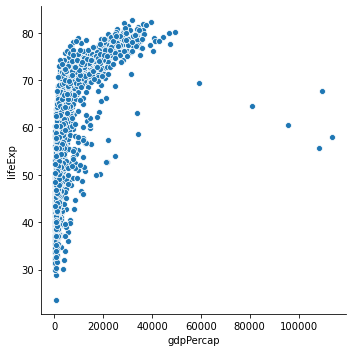

In [60]:
sns.relplot('gdpPercap', 'lifeExp', data = gapminder) # similar to ax.scatter()

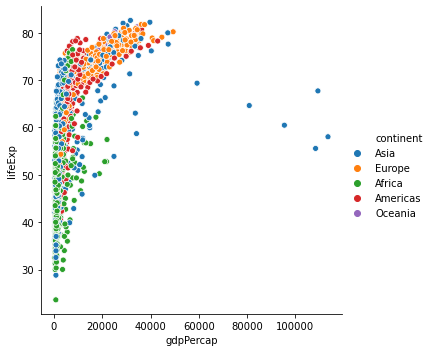

In [61]:
sns.relplot('gdpPercap', 'lifeExp', 
            hue = 'continent', 
            data = gapminder)

[]

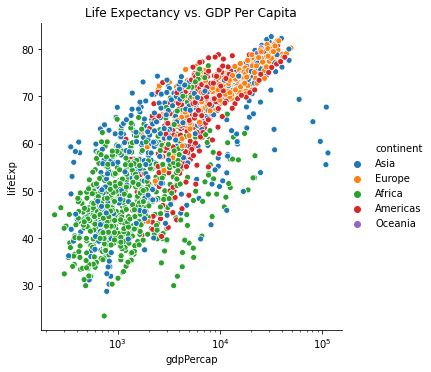

In [62]:
fgrid = sns.relplot('gdpPercap', 'lifeExp', 
                    hue = 'continent', 
                    data = gapminder)

# get the axis from the "FacetGrid" object
ax = fgrid.axes[0][0]

# from here we can do all the normal matplotlib things
ax.set(title = "Life Expectancy vs. GDP Per Capita")
ax.semilogx()

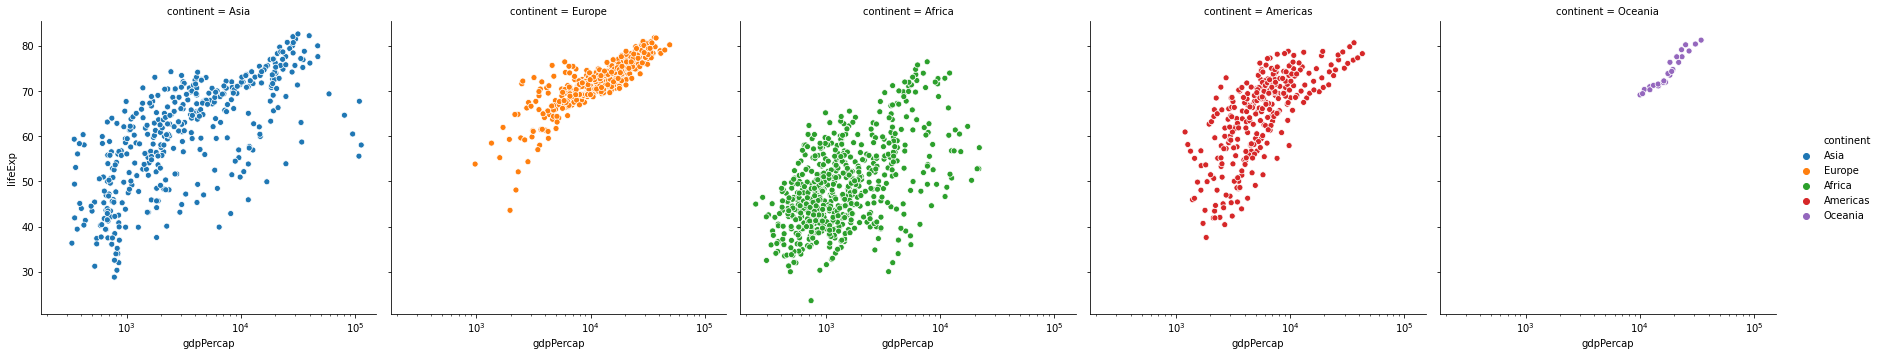

In [63]:
# fancier
fgrid = sns.relplot('gdpPercap', 'lifeExp', 
                    hue = 'continent', 
                    col = 'continent', 
                    data = gapminder)

axes = fgrid.axes.flatten()

for ax in axes:
    ax.semilogx()

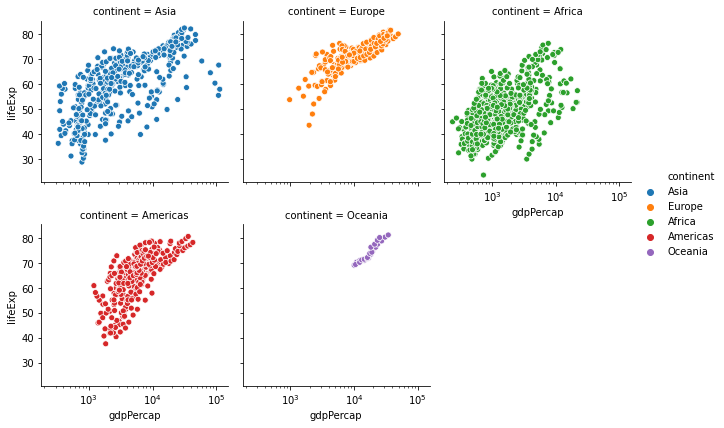

In [64]:
# fancier
fgrid = sns.relplot('gdpPercap', 'lifeExp', 
                    hue = 'continent',
                    col = 'continent', 
                    col_wrap = 3,
                    data = gapminder,
                    height = 3)

axes = fgrid.axes.flatten()

for ax in axes:
    ax.semilogx()

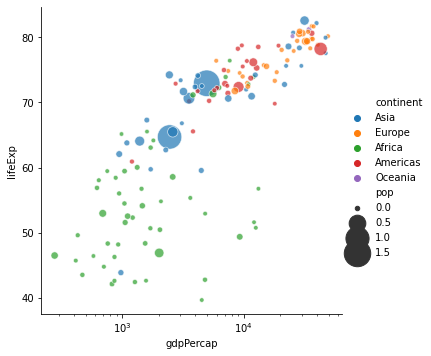

In [80]:
# fancier
import numpy as np

fgrid = sns.relplot('gdpPercap', 'lifeExp', 
                    hue = 'continent',
                    size = 'pop',
                    data = gapminder[gapminder['year'] == 2007],
                    sizes=(20, 700),
                    alpha = 0.7)

axes = fgrid.axes.flatten()

for ax in axes:
    ax.semilogx()

## Bar Charts

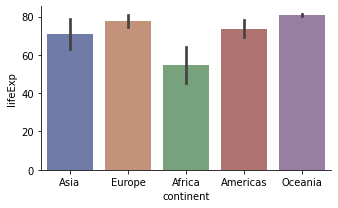

In [81]:
g = sns.catplot(
    data=gapminder[gapminder['year'] == 2007],
    kind="bar",
    x="continent", 
    y="lifeExp", 
    ci="sd", 
    palette="dark", 
    alpha=.6, 
    height=3,
    aspect = 1.6
)

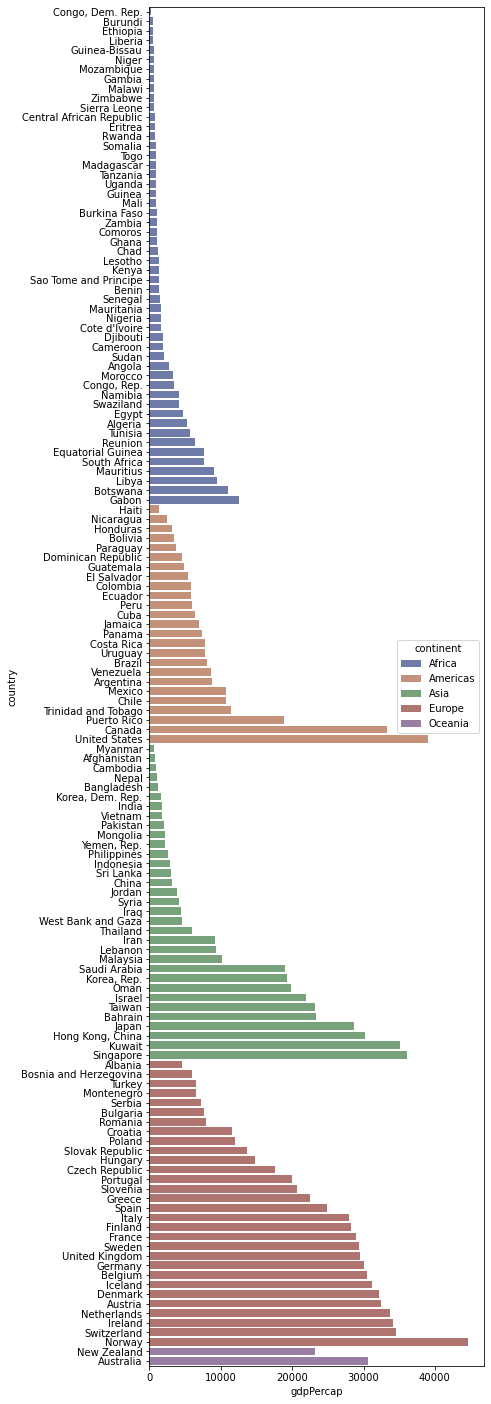

In [83]:
df = gapminder[(gapminder['year'] == 2002)]
df = df.sort_values(["continent", "gdpPercap"], ascending=True)

from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(6, 25))

sns.barplot(x="gdpPercap", 
            y="country", 
            hue = "continent",
            palette="dark",
            alpha = 0.6,
            data=df,
            dodge=False)

### Pairplots

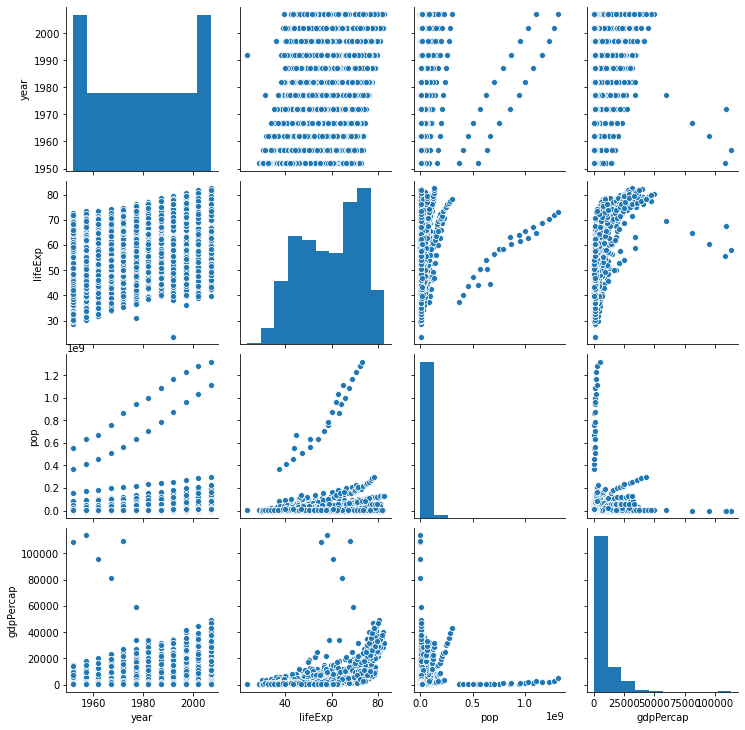

In [10]:
sns.pairplot(gapminder)

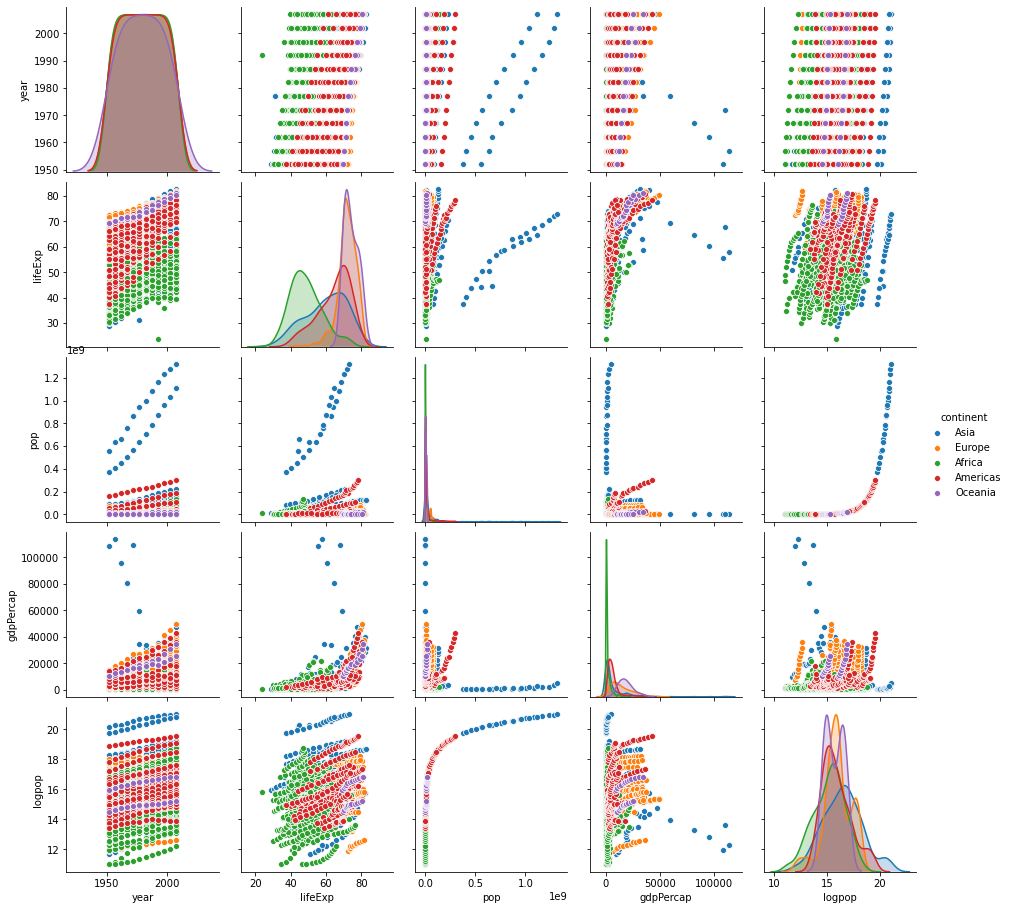

In [85]:
fgrid = sns.pairplot(gapminder, hue = "continent")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'hue'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


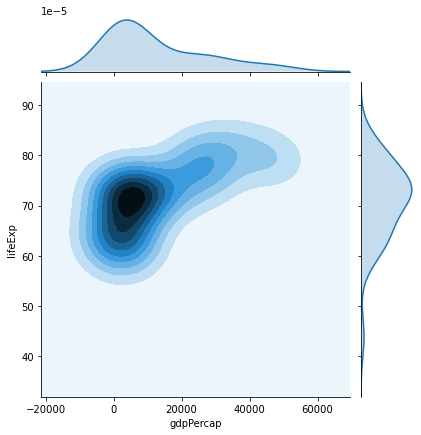

In [86]:
ix = (gapminder['continent'] == 'Asia') & (gapminder['year'] == 2007)
subset = gapminder[ix]

sns.jointplot(
    data=subset,
    x="gdpPercap",
    y="lifeExp",
    hue = "continent",
    kind = "kde"
)